In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv', na_values=' ')
df.shape

(7043, 21)

In [3]:
#drop rows that have nan values
df = df.dropna(axis=0)
df.shape

(7032, 21)

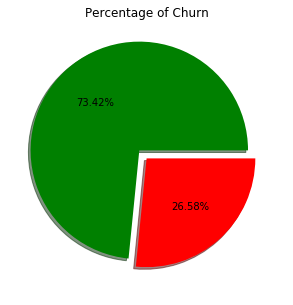

In [4]:
#proportion of churned customers to Non-Churned customers
sizes = df.Churn.value_counts(sort=True)
colors = ["green", "red"]
rcParams['figure.figsize'] = 5,5

plt.pie(sizes, colors=colors, explode = (0.1, 0),autopct='%1.2f%%', shadow=True)
plt.title('Percentage of Churn')
plt.show()

In [5]:
#remove customerid from data frame
df.drop(['customerID'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [7]:
df.shape

(7032, 20)

In [8]:
#convert object to numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [9]:
#convert categorical data to numeric data using getdummies()
cat = df[['gender', 
          'SeniorCitizen',
          'Partner', 
          'Dependents',       
        'PhoneService' ,      
        'MultipleLines',      
        'InternetService',     
        'OnlineSecurity',    
        'OnlineBackup',   
        'DeviceProtection',  
        'TechSupport', 
        'StreamingTV',
        'StreamingMovies',
        'Contract',
        'PaperlessBilling',
        'PaymentMethod',
        'Churn'
]]
for col in cat:
    df[col] = pd.get_dummies(df[col])

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,0,0,29.85,29.85,1
1,0,1,1,1,34,0,1,1,0,1,0,1,1,1,0,1,0,56.95,1889.50,1
2,0,1,1,1,2,0,1,1,0,0,1,1,1,1,1,0,0,53.85,108.15,0
3,0,1,1,1,45,1,0,1,0,1,0,0,1,1,0,1,1,42.30,1840.75,1
4,1,1,1,1,2,0,1,0,1,1,1,1,1,1,1,0,0,70.70,151.65,0


In [11]:
#split the data set to training and test data sets
df['Churn'] = df['Churn'].astype(int)
y = df['Churn']
X = df.drop(['Churn'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [12]:
#set target variable and feature data
y_train = df.Churn
X_train = X

In [38]:
#building decisiontree model
telco_model = DecisionTreeRegressor(max_leaf_nodes=1000,random_state=1)
telco_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=1000, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [39]:
predicted_values = telco_model.predict(X_test)
print(mean_absolute_error(y_test, predicted_values))

0.05157324900670693


#### 3. Factors used to predict churn are:
gender <br>
SeniorCitizen<br>
Partner<br>
Dependents<br>    
PhoneService<br>   
MultipleLines<br>    
InternetService<br>   
OnlineSecurity<br>  
OnlineBackup<br>
DeviceProtection<br>
TechSupport<br>
StreamingTV<br>
StreamingMovies<br>
Contract<br>
PaperlessBilling<br>
PaymentMethod<br>

In [40]:
print("The training prediction accuracy is: ", telco_model.score(X_train,y_train)*100,"%")

The training prediction accuracy is:  86.89503514178381 %


In [41]:
print("The test prediction accuracy is: ", telco_model.score(X_test,y_test)*100,"%")

The test prediction accuracy is:  86.78498508711404 %


### Report the RMSE of your model on the training set and on the test set. How successful is the model?

In [46]:
predicted_values_train = telco_model.predict(X_train)
print(mean_squared_error(y_train, predicted_values_train))

0.02557346426679551


In [47]:
predicted_values_test = telco_model.predict(X_test)
print(mean_squared_error(y_test, predicted_values_test))

0.025225982601032346
